In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
omegas = np.array([100,400,800,1600])

iss = []
Vs = []
for u in omegas:
    data = pd.read_csv(f'RRDE_{u} rpm_.txt',sep=';')
    i = data['WE(1).Current (A)'].values
    V = data['Potential applied (V)'].values
    
    iss.append(i)
    Vs.append(V)


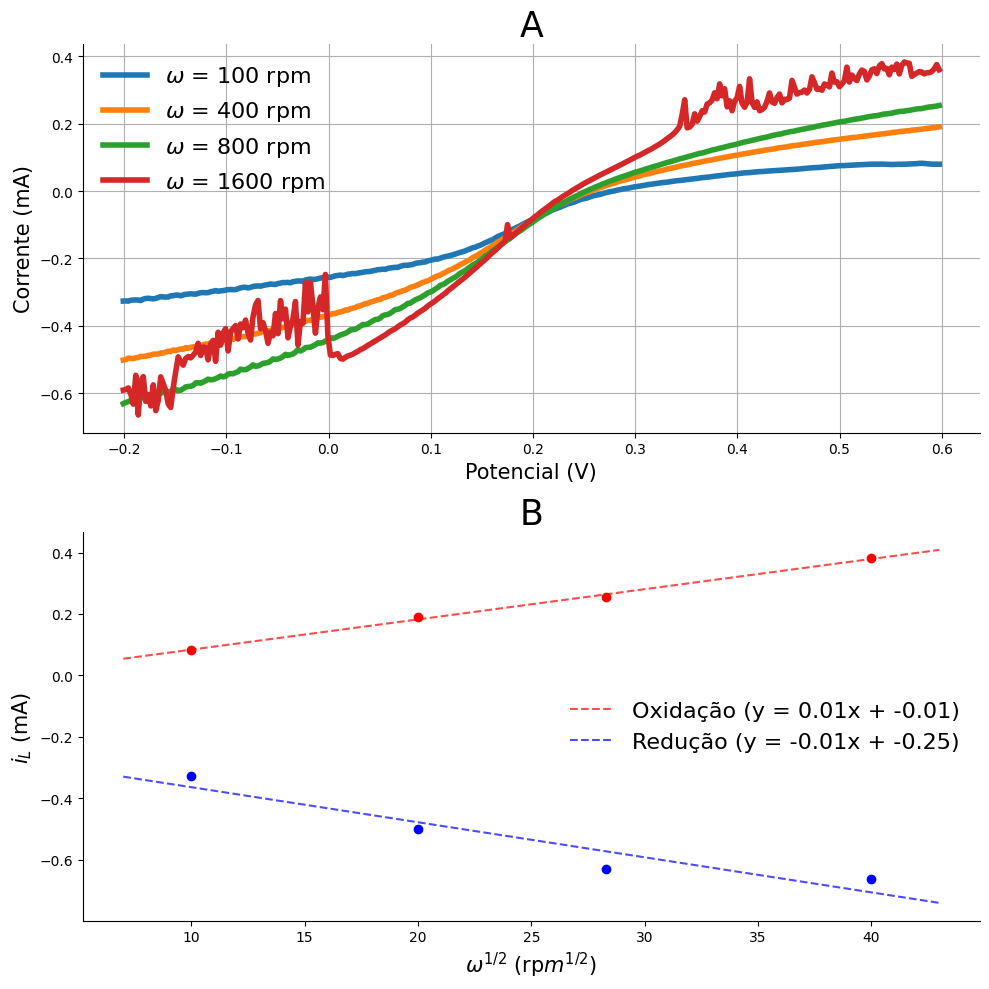

In [3]:
# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

i_max= []
i_min = []

for u in range(len(omegas)):
    V = np.array(Vs[u])
    i = 1000*np.array(iss[u])
    ax1.plot(V, i, lw=4, label=f'$\\omega$ = {omegas[u]} rpm')
    i_max.append(max(i))
    i_min.append(min(i))
    #adicionar cursor para adicionar cada um dos limites de difusão

ax1.set_ylabel('Corrente (mA)',fontsize = 15)
ax1.set_xlabel('Potencial (V)',fontsize = 15)
ax1.grid(True)
ax1.legend(loc='upper left', frameon=False,fontsize=16)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_title('A',fontsize=25)


ax2.plot(omegas**(1/2), i_max, 'o', color='red')
degree = 1  # Grau do polinômio
coeffs1 = np.polyfit(omegas**(1/2), i_max, degree)
x_range = np.linspace(7,43,100)
y_fit_ox = np.polyval(coeffs1, x_range)
ax2.plot(x_range, y_fit_ox, '--', color='red',alpha=0.7, label=f'Oxidação (y = {coeffs1[0]:.2f}x + {coeffs1[1]:.2f})')

ax2.plot(omegas**(1/2), i_min, 'o',color='blue')
coeffs2 = np.polyfit(omegas**(1/2), i_min, degree)
y_fit_re = np.polyval(coeffs2, x_range)
ax2.plot(x_range, y_fit_re, '--', color='blue',alpha=0.7,label=f'Redução (y = {coeffs2[0]:.2f}x + {coeffs2[1]:.2f})')
ax2.set_ylabel('$i_{L}$ (mA)',fontsize = 15)
ax2.set_xlabel('$\\omega^{1/2}$ (rp$m^{1/2}$)',fontsize = 15)
ax2.legend(frameon=False,fontsize=16)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('B',fontsize=25)

plt.tight_layout()
plt.savefig('Levichs.png',dpi=300)

Calcular área eletrotiva

In [10]:
D = 7.6e-6 #cm^2/s
nu = 0.01 #cm^2/s
C = 1e-5 #mol/cm^3
F = 96485 #C/mol
const = 0.62

#velocidade em rad/s e corrente em A
coeffs2 = np.polyfit((2*np.pi/60*np.array(omegas[:-1]))**(1/2), np.array(i_min[:-1])/1000, degree)

A = abs(coeffs2[0]) / (const*F*D**(2/3)*nu**(-1/6)*C)

print(f'A área eletroativa é {A:.2f} cm^2')

A área eletroativa é 0.10 cm^2
